# APM598: Homework 3 (03/26)
## author: Jieshu Wang (jwang490@asu.edu)

# 1. n-gram models
## Ex 1.
### Ex 1. a) 
- Load and tokenize the text attached ’Plato_Republic.txt’.
- Put all the words in lower case to regroup words like ’The’ and ’the’.
- Compute the total number of words N in the text and the number of unique words (size of the vocabulary).
    - size of vocabulary is ___7544___.

In [1]:
with open('./data/Plato_Republic.txt', mode='r', encoding='utf-8-sig') as my_file:
    # encoding='utf-8-sig' is to remove '\ufeff' in the text.
    my_text = my_file.read().replace('\n',' ')
    my_text = my_text.lower()

print(my_text[0:44])

the republic.     persons of the dialogue.  


In [2]:
# Tokenize words
import nltk
nltk.data.path.append("/Users/Jieshu/PycharmProjects/APM598_Deep_Neural_Networks/APM598_notebook4/nltk_data")

my_text_tokenized = nltk.word_tokenize(my_text)
print(my_text_tokenized[0:10])
print("-- length of texts (words) : ",len(my_text_tokenized))

['the', 'republic', '.', 'persons', 'of', 'the', 'dialogue', '.', 'socrates', ',']
-- length of texts (words) :  136312


### Ex 1. b) 
- Build a uni-gram. 
- Deduce the 5 most common words with at least 8 characters. 
    - 'certainly', 'knowledge', 'injustice', 'therefore', 'question'

In [3]:
# build a uni-gram
my_unigram = nltk.ngrams(my_text_tokenized, 1)
freq_dist_uni = nltk.FreqDist(my_unigram)

# deduce the 5 most common words with at least 8 characters
sorted_freq_dist_uni = freq_dist_uni.most_common()
sorted_8_character_words = [(i[0][0], i[1]) for i in sorted_freq_dist_uni if len(i[0][0]) >=8]
print("The 5 most frequent words with at least 8 characters are:")
print(sorted_8_character_words[0:5])
print(f'The number of unique words are {freq_dist_uni.B()}')

The 5 most frequent words with at least 8 characters are:
[('certainly', 235), ('knowledge', 152), ('injustice', 111), ('therefore', 109), ('question', 99)]
The number of unique words are 7544


### Ex 1. c)
- Build a bi-gram and define a function that given two words (x1, x2) compute the probability
: $\mathbb{P}(x_{t+1}|x_t) = \frac{\#\{(x_t,x_{t+1})\}}{\#\{(x_t)\}\}}$.

In [4]:
my_bigram = nltk.ngrams(my_text_tokenized, 2)
# define a function to compute the probability
def prob_word_pair(x_1: str, x_2: str, text) ->float:
    corpus = nltk.word_tokenize(text.lower())
    unigram = nltk.ngrams(corpus, 1)
    bigram = nltk.ngrams(corpus, 2)
    freq_distribution_uni = nltk.FreqDist(unigram)
    freq_distribution_bi = nltk.FreqDist(bigram)
    n_x_1 = freq_distribution_uni[(x_1.lower(),)]
    n_x_1_2 = freq_distribution_bi[(x_1.lower(), x_2.lower())]
    prob = n_x_1_2/n_x_1
    return prob

print(prob_word_pair('I', 'think', my_text))

0.032217308907138344


## Ex 1. d) 
- Deduce the so-called perplexity of the bi-gram model
    - 37.89928782828084
    

In [5]:
def compute_perplexity(text)->float:
    corpus = nltk.word_tokenize(text.lower())
    corpus_length = len(corpus)
    unigram = nltk.ngrams(corpus, 1)
    bigram = nltk.ngrams(corpus, 2)
    freq_distribution_uni = nltk.FreqDist(unigram)
    freq_distribution_bi = nltk.FreqDist(bigram)
    product = 1
    for i in range(corpus_length-1):
        x_1 = corpus[i]
        x_2 = corpus[i+1]
        n_x_1 = freq_distribution_uni[(x_1.lower(),)]
        n_x_1_2 = freq_distribution_bi[(x_1.lower(), x_2.lower())]
        prob = n_x_1_2/n_x_1
        product *= prob**(-1/(corpus_length-1))
    perplexity = product
    return perplexity

print("The perplexity of Plato's Republic is: ")
print(compute_perplexity(my_text))

The perplexity of Plato's Republic is: 
37.89928782828084


# 2. Recurrent Neural Networks
## Ex 2. 
### Ex 2. a) find the output y1, . . . , y5 and deduce the predicted characters

In [1]:
from HW3_util import ModuleParamsVanillaRNN, VanillaRNN, letter_to_tensor, torch

a_ex2a = torch.tensor([[1.0, -1.0, -0.5, 0.5],
                       [1.0, 1.0, -0.5, -1]])
r_ex2a = torch.tensor([[1.0, 0.0],
                      [0.0, 1.0]])
b_ex2a = torch.tensor([[1.0, 1.0],
                       [0.5, 1.0],
                       [-1.0, 0.0],
                       [0.0, -0.5]])
all_letters_ex2a = 'helo'
input_letter_list = ['h', 'e', 'l', 'l', 'o']

class VanillaRNNEx2a(VanillaRNN):
    def __init__(self, module_params: ModuleParamsVanillaRNN):
        super(VanillaRNNEx2a, self).__init__(module_params)
        with torch.no_grad():
            self._A.weight.data = a_ex2a
            self._R.weight.data = r_ex2a
            self._B.weight.data = b_ex2a

def predict_characters_ex2a(input_list: list, all_letters: str):
    vanilla_rnn_params = ModuleParamsVanillaRNN(all_letters_base=all_letters)
    my_vanilla_rnn_ex2a = VanillaRNNEx2a(vanilla_rnn_params)
    h = my_vanilla_rnn_ex2a.init_hidden()
    predicted_charaters_list = []
    for i in range(len(input_list)):
        input = input_list[i]
        print(f'--- {i}---')
        x = letter_to_tensor(input, all_letters)
        y, h = my_vanilla_rnn_ex2a(x, h)
        predicted_character = all_letters[y.argmax()]
        print(f"    input: {input}")
        print(f'    y_{i+1}: {y}')
        print(f'    output: {predicted_character}')
        predicted_charaters_list.append(predicted_character)
    print(f'Predicted characters are: {predicted_charaters_list}')

print('the output y1, . . . , y5 and deduce the predicted characters')
predict_characters_ex2a(input_letter_list, all_letters_ex2a)

the output y1, . . . , y5 and deduce the predicted characters
--- 0---
    input: h
    y_1: tensor([[ 1.5232,  1.1424, -0.7616, -0.3808]], grad_fn=<MmBackward>)
    output: h
--- 1---
    input: e
    y_2: tensor([[ 0.7087,  0.8257,  0.2340, -0.4713]], grad_fn=<MmBackward>)
    output: e
--- 2---
    input: l
    y_3: tensor([[-0.2096,  0.1031,  0.6255, -0.2079]], grad_fn=<MmBackward>)
    output: l
--- 3---
    input: l
    y_4: tensor([[-0.8934, -0.4887,  0.8095,  0.0420]], grad_fn=<MmBackward>)
    output: l
--- 4---
    input: o
    y_5: tensor([[-1.0946, -0.9446,  0.3000,  0.3973]], grad_fn=<MmBackward>)
    output: o
Predicted characters are: ['h', 'e', 'l', 'l', 'o']


### Ex 2. b) Find matrices A, R, B such that the predicted characters are ”olleh”.
- A.weight: [[-1.6251, -0.6183,  0.7184,  1.0523], [-1.5250, -0.3831,  1.4286, -0.9764]]
- R.weight: [[ 2.6304,  1.8039], [-1.3376, -0.0809]]
- B.weight: [[ 2.6276, -1.8918], [ 2.9543,  2.2045], [-2.1664,  2.6917], [-1.7653, -2.3543]]

In [2]:
from HW3_util import VanillaRNNTrainer, VanillaRNN, ModuleParamsVanillaRNN

all_letters_ex2b = 'helo'
training_x_ex2b = 'hello'
training_y_ex2b = 'olleh'
module_params_ex2b = ModuleParamsVanillaRNN(all_letters_base=all_letters_ex2b, chunk_size=5,
                                            is_print_training=True, n_steps=600, printing_step=60)
trainer_ex2b = VanillaRNNTrainer(module_params=module_params_ex2b, module=VanillaRNN,
                                 training_x=training_x_ex2b, training_y=training_y_ex2b)
print(trainer_ex2b.model.parameters())

  input = hello
  output = elell
loss at step 0: 1.3737117767333984
  input = hello
  output = olllh
loss at step 60: 1.2573498725891112
  input = hello
  output = olllh
loss at step 120: 1.0862698554992676
  input = hello
  output = olllh
loss at step 180: 0.9848179817199707
  input = hello
  output = olllh
loss at step 240: 0.9285406112670899
  input = hello
  output = olleh
loss at step 300: 0.8724645614624024
  input = hello
  output = olleh
loss at step 360: 0.8253401756286621
  input = hello
  output = olleh
loss at step 420: 0.8008445739746094
  input = hello
  output = olleh
loss at step 480: 0.7867999076843262
  input = hello
  output = olleh
loss at step 540: 0.7776077270507813
<generator object Module.parameters at 0x10511ad50>


In [3]:
result_model_parameters = trainer_ex2b.model.named_parameters()
for name, params in result_model_parameters:
    print(f'{name}')
    print(f'{params}')

_A.weight
Parameter containing:
tensor([[ 1.4536, -0.5005, -0.9105,  1.1894],
        [-1.7484, -0.7461,  0.5157,  1.1955]], requires_grad=True)
_R.weight
Parameter containing:
tensor([[ 1.0282,  1.6511],
        [-1.5973,  2.2827]], requires_grad=True)
_B.weight
Parameter containing:
tensor([[ 2.5070,  2.3268],
        [-1.8582,  2.4097],
        [-2.5935, -2.4388],
        [ 2.4732, -1.9732]], requires_grad=True)


## Ex 3. vanishing/exploding gradient
### Ex 3 a) 
### Ex 3 b) compute and plot the difference

The difference is 
              perturbation  perturbation_log  y_difference  y_difference_log  \
1.000000e-04  1.000000e-04              -4.0      1.213693          0.084109   
1.000000e-05  1.000000e-05              -5.0      1.128870          0.052644   
1.000000e-06  1.000000e-06              -6.0      0.265372         -0.576146   
1.000000e-07  1.000000e-07              -7.0      0.027112         -1.566843   
1.000000e-08  1.000000e-08              -8.0      0.002712         -2.566748   
1.000000e-09  1.000000e-09              -9.0      0.000271         -3.566747   

                     eq_2  
1.000000e-04  1862645.625  
1.000000e-05  1862645.625  
1.000000e-06  1862645.625  
1.000000e-07  1862645.625  
1.000000e-08  1862645.625  
1.000000e-09  1862645.625  


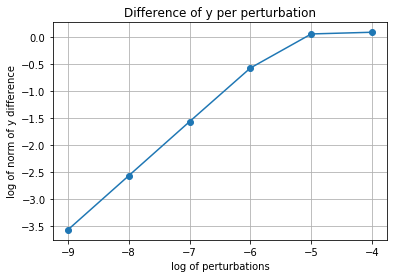

In [2]:
from HW3_util import ModuleParamsVanillaRNN, VanillaRNN, letter_to_tensor, torch, compute_y_difference
import matplotlib.pyplot as plt

a_ex3b = torch.tensor([[1.0, 0.0],
                       [0.0, 1.0]])
r_ex3b = torch.tensor([[0.5, -1.0],
                      [-1.0, 0.5]])
b_ex3b = torch.tensor([[1.0, 0.0],
                       [0.0, 1.0]])
perturbation_values_ex3 = [10**(-i) for i in range(4, 10)]
all_letters_ex3b = 'ab'

class VanillaRNNEx3b(VanillaRNN):
    def __init__(self, module_params: ModuleParamsVanillaRNN):
        super(VanillaRNNEx3b, self).__init__(module_params)
        self._in_out_size = 2
        self._hidden_size = 2
        with torch.no_grad():
            self._A.weight.data = a_ex3b
            self._R.weight.data = r_ex3b
            self._B.weight.data = b_ex3b

module_params_ex3b = ModuleParamsVanillaRNN(all_letters_base=all_letters_ex3b)

def pertubating_x_ex3b(x, perturbation):
    return x + torch.tensor([perturbation, -perturbation])

x_1_ex3b = torch.tensor([0.0, 0.0])
x_n_ex3b = torch.tensor([0.0, 0.0])
h_n_ex3b = torch.tensor([0.0, 0.0])
df_ex3b = compute_y_difference(num_times=30, x_1=x_1_ex3b, x_n=x_n_ex3b, h_0=h_n_ex3b,
                               perturbating_func=pertubating_x_ex3b, 
                               perturbation_values=perturbation_values_ex3,
                               module=VanillaRNNEx3b, module_params=module_params_ex3b)
print(f'The difference is \n{df_ex3b}')

# plot log-log scale
plt.figure(1)
plt.clf()
plt.plot(df_ex3b['perturbation_log'], df_ex3b['y_difference_log'], '-o')
plt.grid()
plt.xlabel('log of perturbations')
plt.ylabel('log of norm of y difference')
plt.title("Difference of y per perturbation")
plt.show()

### Ex 3c) Proceedsimilarlyasb)usingx1 =(2,1)andx1ε =(2+ε,1−ε).
Why does the perturbation have a small effect in this case compare to b)?

The difference is 
              perturbation  perturbation_log  y_difference y_difference_log  \
1.000000e-04  1.000000e-04              -4.0           0.0               -∞   
1.000000e-05  1.000000e-05              -5.0           0.0               -∞   
1.000000e-06  1.000000e-06              -6.0           0.0               -∞   
1.000000e-07  1.000000e-07              -7.0           0.0               -∞   
1.000000e-08  1.000000e-08              -8.0           0.0               -∞   
1.000000e-09  1.000000e-09              -9.0           0.0               -∞   

                      eq_2  
1.000000e-04  9.375501e-09  
1.000000e-05  9.375501e-09  
1.000000e-06  9.375501e-09  
1.000000e-07  9.375501e-09  
1.000000e-08  9.375501e-09  
1.000000e-09  9.375501e-09  


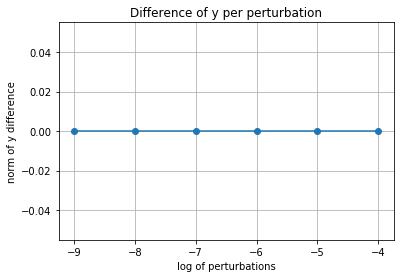

In [12]:
from HW3_util import compute_y_difference, torch

x_1_ex3c = torch.tensor([2.0, 1.0])
x_n_ex3c = torch.tensor([0.0, 0.0])
h_n_ex3c = torch.tensor([0.0, 0.0])

df_ex3c = compute_y_difference(30, x_1_ex3c, x_n_ex3c, h_n_ex3c, pertubating_x_ex3b, perturbation_values_ex3, 
                               VanillaRNNEx3b, module_params_ex3b, precision=10)
print(f'The difference is \n{df_ex3c}')

# plot log-log scale
plt.figure(1)
plt.clf()
plt.plot(df_ex3c['perturbation_log'], df_ex3c['y_difference'], '-o')
# plt.plot(df_ex3b['perturbation_log'], df_ex3b['y_difference'], '-o', color='r')
plt.grid()
plt.xlabel('log of perturbations')
plt.ylabel('norm of y difference')
plt.title("Difference of y per perturbation")
plt.show()

### Ex 3 Extra) 
Proceed similarly as b) using x1 = (0, 0) and x1ε = (ε, ε). Why is the perturbation having a small effect? 
In general, from a random perturbation, do you expect a small or large effect when x1 = (0, 0)?

The difference is 
              perturbation  perturbation_log  y_difference  y_difference_log  \
1.000000e-04  1.000000e-04              -4.0  1.317089e-13        -12.880385   
1.000000e-05  1.000000e-05              -5.0  1.317089e-14        -13.880385   
1.000000e-06  1.000000e-06              -6.0  1.317089e-15        -14.880385   
1.000000e-07  1.000000e-07              -7.0  1.317089e-16        -15.880385   
1.000000e-08  1.000000e-08              -8.0  1.317089e-17        -16.880385   
1.000000e-09  1.000000e-09              -9.0  1.317089e-18        -17.880385   

                     eq_2  
1.000000e-04  1862645.625  
1.000000e-05  1862645.625  
1.000000e-06  1862645.625  
1.000000e-07  1862645.625  
1.000000e-08  1862645.625  
1.000000e-09  1862645.625  


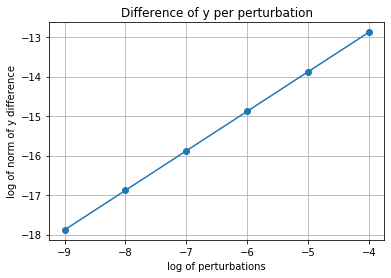

In [7]:
def perturbating_x_ex3_extra(x, perturbation):
    return x + torch.tensor([perturbation, perturbation])

x_1_ex3_extra = torch.tensor([0.0, 0.0])
x_n_ex3_extra = torch.tensor([0.0, 0.0])
h_n_ex3_extra = torch.tensor([0.0, 0.0])

df_ex3_extra = compute_y_difference(30, x_1_ex3_extra, x_n_ex3_extra, h_n_ex3_extra, perturbating_x_ex3_extra, 
                               perturbation_values_ex3, VanillaRNNEx3b, module_params_ex3b, precision=10)
print(f'The difference is \n{df_ex3_extra}')

# plot log-log scale
plt.figure(1)
plt.clf()
plt.plot(df_ex3_extra['perturbation_log'], df_ex3_extra['y_difference_log'], '-o')
# plt.plot(df_ex3b['perturbation_log'], df_ex3b['y_difference_log'], '-o', color='red')
plt.grid()
plt.xlabel('log of perturbations')
plt.ylabel('log of norm of y difference')
plt.title("Difference of y per perturbation")
plt.show()